# Esercizio 4 - Segmentation

- Implementare un semplice algoritmo di text segmentation
- Usare come test un input di k paragrafi presi da differenti temi (ad es. pagine Wikipedia)  
- Il vostro sistema è in grado di trovare i giusti “tagli”?

## Idea:

- Ripulisco il file di testo da stopwords e punteggiatura e lo tokenizzo e lemmatizzo, ottenendo una lista di relevant words
- Suddivido il file di input in una lista di liste: ogni riga del file di input diventa una lista di relevant words
- Calcolo la cosine similarity tra ogni riga del file di input e la riga successiva
- Posiziono i tagli nei punti di minimo della cosine similarity


## File di input

Come file di input uso un file di testo contenente un po' di paragrafi presi da Wikipedia riguardo a 4 argomenti diversi:
- Lebanon
- Racing bike
- Labrador retriever
- Indie rock  

I tagli che dovrebbe trovare il mio algoritmo sono alla linea 27-28, alla linea 58-59 e alla linea 97-98.


In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

### Preprocessing del file di input

In [5]:
data = []
with open('../data/wiki.txt', 'r') as f:
    for line in f:
        data.append(line.strip())
    
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
paragraphs = []
for line in data:
    words = [lemmatizer.lemmatize(token.lower()) for token in tokenizer.tokenize(line) if token.lower() not in stop_words] 
    paragraphs.append(words)

# paragraphs[0]

### Creo una lista di tutte le relevant words del file di input, rimuovendo i duplicati ma mantenendo l'ordine 

In [6]:
# Create a list of all words with duplicates
all_words = []
for paragraph in paragraphs:
    for word in paragraph:
        all_words.append(word)

# Remove duplicates but keep the order
all_words = list(dict.fromkeys(all_words))
# all_words

# all_words = list(all_words)
# all_words_dict = {word: i for i, word in enumerate(all_words)}
# all_words_dict

### Creo un dizionario per ogni paragrafo del file di input, dove la chiave è la parola e il valore la sua frequenza

In [37]:
# # Create a dictionary of all words in one paragraph
# def paragraph_dict(p1):
#     paragraph_dict = {}
#     for word in all_words:
#         paragraph_dict[word] = 0
#     for word in p1:
#         paragraph_dict[word] += 1
#     return paragraph_dict

# # Create a dictionary of all words in n paragraphs
# def paragraph_dict(p1, p2, p3):
#     paragraph_dict = {}
#     for word in all_words:
#         paragraph_dict[word] = 0
#     for word in p1:
#         paragraph_dict[word] += 1
#     if p2 != None:
#         for word in p2:
#             paragraph_dict[word] += 1
#     if p3 != None:
#         for word in p3:
#             paragraph_dict[word] += 1 
#     return paragraph_dict

# Create a dictionary of all words in n paragraphs
def paragraph_dict(*args):
    paragraph_dict = {}
    for word in all_words:
        paragraph_dict[word] = 0
    for dict in args:
        for word in dict:
            paragraph_dict[word] += 1
    return paragraph_dict

# From the dictionary create a list of word counts
def paragraph_list(paragraph_dict):
    paragraph_list = []
    for word in all_words:
        paragraph_list.append(paragraph_dict[word])
    return paragraph_list

# par1 = paragraphs[0]
# par2 = paragraphs[1]
# par3 = paragraphs[2]
# # par_dict = paragraph_dict(par1, par2)
# par_dict = paragraph_dict(par1, par2, par3)
# par_list = paragraph_list(par_dict)
# par_list

### Calcolo della cosine similarity tra ogni riga del file di input e la riga successiva

In [82]:
# Compute cosine similarity between all paragraphs two by two
cos_sim_list = []
for i in range(0, len(paragraphs) - 3):
    par1 = paragraphs[i]
    par2 = paragraphs[i + 1]
    dict1 = paragraph_dict(par1, par2)
    list1 = paragraph_list(dict1)
    par3 = paragraphs[i + 2]
    par4 = paragraphs[i + 3]
    dict2 = paragraph_dict(par3, par4)
    list2 = paragraph_list(dict2)
    cos_sim_list.append(cosine_similarity([list1], [list2])[0][0])
    # print(f'Paragraphs {i + 1} and {i + 2} are similar to {i + 3} and {i + 4} with a cosine similarity of {cos_sim_list[i]}')

# Compute cosine similarity between all paragraphs n by n
def cos_sim(n):
    cos_sim_list = []
    for i in range(0, len(paragraphs) - (2 * n)):
        par1 = []
        dict1 = {}
        list1 = []
        for j in range(0, n):
            par1.append(paragraphs[i + j])
        dict1 = paragraph_dict(*par1)
        list1 = paragraph_list(dict1)
        par2 = []
        dict2 = {}
        list2 = []
        for j in range(0, n - 1):
            par2.append(paragraphs[i + j + n + 1])
        dict2 = paragraph_dict(*par2)
        list2 = paragraph_list(dict2)
        cos_sim_list.append(cosine_similarity([list1], [list2])[0][0])
        # print(f'Paragraphs from {i} to {i + n - 1} are similar to paragraphs from {i + 1} to {i + n} with a cosine similarity of {cos_sim_list[i]}')
    return cos_sim_list

cos_sim_2 = cos_sim(4)
print(cos_sim_2 == cos_sim_list)
    

False


### Plot della cosine similarity

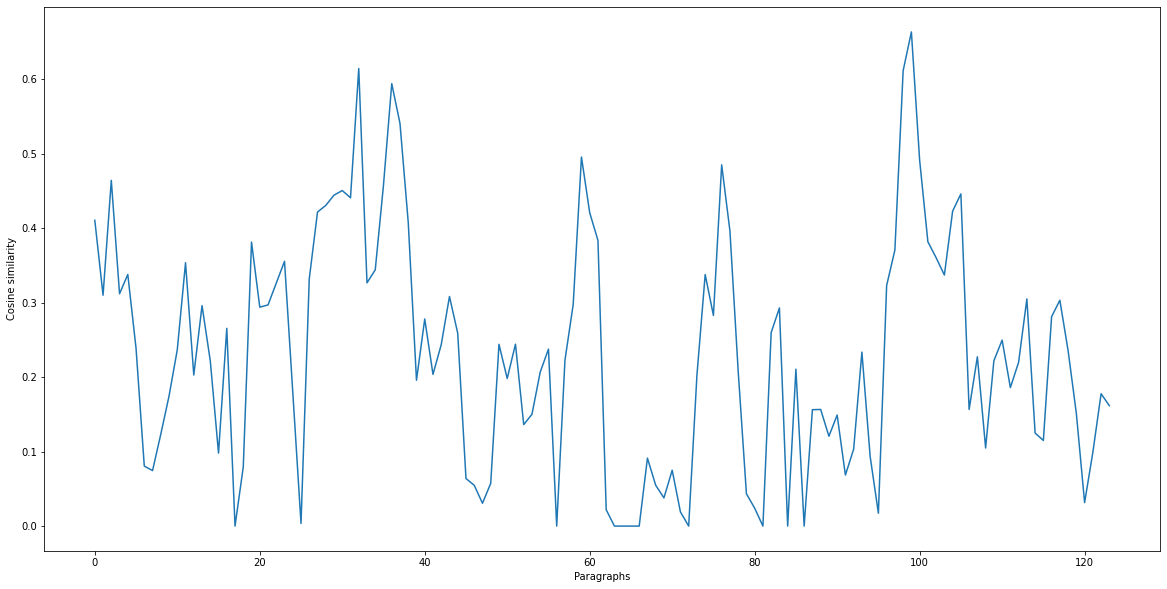

In [84]:
# Plot the cosine similarity
fig = plt.figure(figsize=(20, 10))
plt.plot(cos_sim_list)
plt.xlabel('Paragraphs')
plt.ylabel('Cosine similarity')
plt.show()